<a href="https://colab.research.google.com/github/CaioLSouza/my_portfolio_en/blob/main/Churn_prediction_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Churn Prediction


In a business, *churn* is a metric that indicates the number of customers who canceled a company's service/subscription, usually measured in a defined time interval (weekly, monthly, yearly, etc.). Thus, if, for example, a company has a base of 100 customers and 10 of them cancel the service/product offered by it, then the churn rate is equal to 10%. Therefore, churn is a problem faced by the most varied types of companies that seek to minimize its occurrence as much as possible.

It is also important to emphasize that the churn problem can be understood both from the perspective of the number of customers and from the perspective of the total monetary loss caused by cancellations, which is the so-called MRR churn. MRR churn is the sum of the value of canceled subscriptions. This allows you to discriminate the loss of larger and more important customers for your business from those customers who are less important.

Therefore, for a company to achieve growth in its number of customers, it is necessary that the number of new customers exceeds the number of churns. Furthermore, the cost of acquiring new customers is naturally higher than the cost of retaining customers who already subscribe to your service.


Therefore, the possibility of giving a company the ability to predict which of its customers are about to cancel their subscription is extremely important and convenient. Based on this information, the company is able to make decisions that prevent the loss of these customers, such as sending official messages, offering discounts, special opportunities, etc.

In this context, we can see how much the use of machine learning can be useful. Using it, we can build models that are able to predict which customers are most likely to unsubscribe. Thus, a company would be able to use this information to reduce the number of cancellations, allowing an increase in its revenues and a reduction in its costs.

Given that, the purpose of this project is to use data from a telecommunications company to try to predict whether or not a particular customer will cancel their service (churn).

## Problem definition

As you can see, we are dealing with a typical supervised machine learning problem for classification: we want, from a set of data and known information, to predict whether a given customer will or will not cancel their subscription. Therefore, the target variable or response variable is a binary variable that tells us whether or not *churn* occurred.

## Import packages and libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

# validation
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV


# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# training and testing split
from sklearn.model_selection import train_test_split

# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, roc_auc_score

## Data gathering

The dataset that will be used was made available by the IBM Developer teaching platform and can be found at this [link](https://raw.githubusercontent.com/CaioLSouza/datasets/main/churn_dataset.csv) in ``csv format ``.

It does not come with any description about it, but the names of the *features* are suggestive enough for a clear understanding of the meaning of the data.

In [2]:
DATA_PATH = "https://raw.githubusercontent.com/CaioLSouza/datasets/main/churn_dataset.csv"
churn = pd.read_csv(DATA_PATH)
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(f"Number of rows: {churn.shape[0]}")
print(f"Number of features: {churn.shape[1]}")

Number of rows: 7043
Number of features: 21


In [4]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Features dictionary

``customerID``: Customer identification code.

``gender``: Gender (male or female).

``SeniorCitizen``: Whether the client is retired or not.

``Partner``: Whether the client is a partner or not.

``Dependents``: Whether the client has dependents or not.

``tenure``: Number of months the customer has been with the company.

``PhoneService``: Whether the client has phone services or not.

``MultipleLines``: Whether the client has multiple lines or not.

``InternetServices``: What type of internet service the client has.

``OnlineSecurity``: Whether the client has online security or not.

``OnlineBackup``: Whether the client has online backup or not

``DeviceProtection``: Whether the client has a protection device or not.

``TechSupport``: Whether the customer has technological support or not.

``StreamingTV``: Whether the client has streaming TV service or not.

``StreamingMovies``: Whether the client has movie streaming service or not.

``Contract``: Contract signing time.

``PaperlessBilling``: Whether the bill for the customer to pay is online or not.

``PaymentMethod``: Payment method

``MonthlyCharges``: Monthly payment

``TotalCharges``: Total payment (product between ``MonthlyCharges`` and ``Tenure``)

``Churn``: Whehter there was or was not churn (target variable)

As you can see, the vast majority of variables are categorical. Only ``tenure``, ``MonthlyCharges`` and ``TotalCharges`` are numeric variables.

## Functions used in this project

In [5]:
def classification_features(dataset, target):
  ''' classify the features as binary and categorical, categorical or numerical '''
  bin_var = []
  cat_var = []
  num_var = []
  for col in dataset: 
    if dataset[col].nunique() == 2 and col != target:
      bin_var.append(col)
    if dataset[col].dtype == 'float64' or dataset[col].dtype == 'int64' and col not in bin_var and col != target:
      num_var.append(col)
    if dataset[col].dtype == 'object' and col not in bin_var and col != target:
      cat_var.append(col)
  return bin_var, cat_var, num_var

In [6]:
def metrics(y_test, preds):
  ''' show the following metrics: accuracy, recall, precision and f1_score '''
  print('Accuracy: ', accuracy_score(y_test, preds))
  print('Recall: ', recall_score(y_test, preds))
  print('Precision: ', precision_score(y_test, preds))
  print('F1-score: ', f1_score(y_test, preds))

In [7]:
def get_metrics(cross_validation):
  ''' show metrics obtained by cross validation '''
  for key, value in cross_validation.items():
    print(key, np.mean(value))

In [8]:
def plot_confusion_matrix(y_test, preds):
  ''' creates a plot with the confusion matrix '''
  matrix = confusion_matrix(y_test, preds)
  fig, ax = plt.subplots(figsize=(8, 5))
  sns.heatmap(matrix, annot=True, cmap='viridis', fmt='d')
  ax.set_title('Matriz de confusão para o XGBoost')
  ax.set_xlabel('Previsto')
  ax.set_ylabel('Observado')
  plt.tight_layout()

In [9]:
def business_metrics(y_test, preds, dataset, monthly_charges):
  '''Computes business metrics related to the potencial monetary gain of the model'''
  churn_rate = len(y_test[y_test == 1]) / len(y_test)

  predicted_churn_rate = len(preds[preds == 1]) / len(preds)

  recall = recall_score(y_test, preds)

  correct_positive_predictions = len(preds[(preds[preds == 1]) & (preds == y_test)]) / len(y_test)

  positive_correct = preds[(preds == 1) & (preds == y_test)]
  positive_correct = pd.Series(positive_correct, index=y_test.index)
  mrr = dataset.loc[positive_correct.index]
  anual_mrr = mrr[monthly_charges].mean() * 12

  summary = pd.Series([
      churn_rate, 
      predicted_churn_rate,
      recall,
      correct_positive_predictions,
      anual_mrr
  ],
  index = [
      'Churn rate', 
      'Predicted churn rate',
      'Recall' ,
      'Corrected predicted churns', 
      'Yearly MRR churn by client'
  ])
  
  return summary

## Exploratory data analysis

Let's start by doing an exploratory analysis of the available data.

### Missing values

First, let's check the amount of missing values ​​inside the variables.

In [10]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Apparently, there are no missing values ​​within the dataset.

### Variable types

In [11]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The most striking thing here is the ``TotalCharges`` variable, which is a numeric variable, but whose data type is listed as categorical (object). So it's natural to think about turning it into numeric. However, when we do this, we get an error, as there is information inside that variable that is only marked with two quotation marks (" ").


In [12]:
len(churn['TotalCharges'].loc[churn['TotalCharges'] == ' '])

11

What happened was that the missing values ​​of this variable were marked with double quotes to indicate them. So let's replace these values ​​with missing values ​​so we can turn the variable back to numeric.


In [13]:
churn['TotalCharges'].replace(' ', 'NaN', inplace=True)

In [14]:
churn['TotalCharges'].isnull().sum()

0

In [15]:
churn['TotalCharges'] = churn['TotalCharges'].astype(float)

In addition to the division between categorical and numerical variables, the subdivision between binary and non-binary categorical variables is also important. Thus, for the variables below, those that have only two distinct values ​​as unique values ​​are binary variables.


In [16]:
churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

### Variável-alvo

A variável que estamos tentando prever nesse conjunto de dados é a variável ``Churn``.

In [17]:
churn['Churn'].unique()

array(['No', 'Yes'], dtype=object)

It is, as already seen, a binary categorical variable. It will be useful
store in different variables the values ​​for each different class.

In [18]:
class_0 = churn.loc[churn['Churn'] == 'No']
class_1 = churn.loc[churn['Churn'] == 'Yes']

Vamos agora analisar o balanceamento dos dados.

In [19]:
print(f"Percentage of positive class values: {len(churn['Churn'].loc[churn['Churn'] == 'Yes']) / len(churn['Churn'])}")
print(f"Percentage of negative class values: { 1 - len(churn['Churn'].loc[churn['Churn'] == 'Yes']) / len(churn['Churn'])}")

Percentage of positive class values: 0.2653698707936959
Percentage of negative class values: 0.7346301292063041


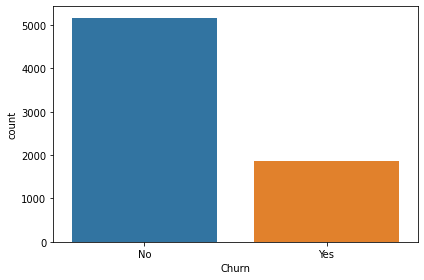

In [20]:
sns.countplot(x=churn['Churn'])
plt.tight_layout()

As one might intuitively expect, most of the data correspond to the negative class, that is, people who did not cancel their service. This imbalance can be dealt with in more depth during the construction of the model itself.


### Frequency distributions

In this step, we can start by analyzing the distribution of the two continuous numerical variables of the dataset: ``TotalCharges`` and ``MonthlyCharges``, respectively. Let's also compare the histograms for the data where there is no churn with the data where there is churn.

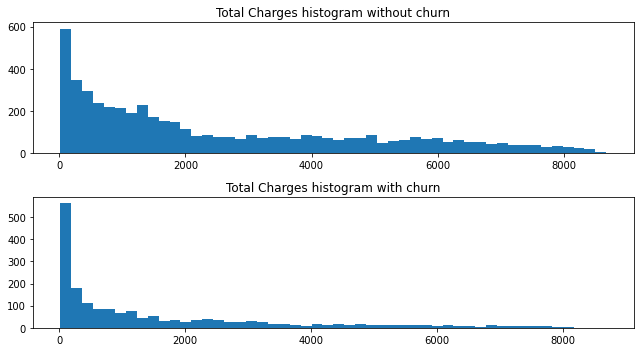

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9, 5))



ax[0].hist(class_0['TotalCharges'], bins=50)
ax[0].set_title('Total Charges histogram without churn')

ax[1].hist(class_1['TotalCharges'], bins=50)
ax[1].set_title('Total Charges histogram with churn')


plt.tight_layout()

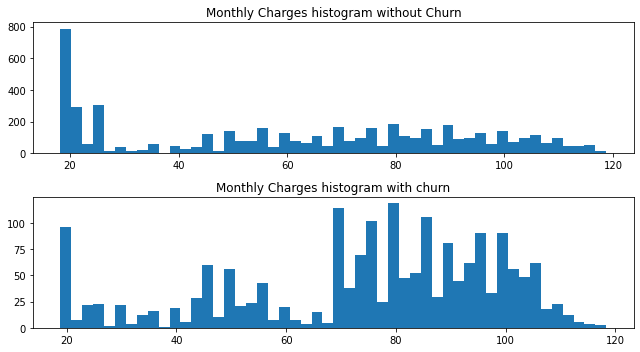

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9, 5))

ax[0].hist(class_0['MonthlyCharges'], bins=50)
ax[0].set_title('Monthly Charges histogram without Churn')

ax[1].hist(class_1['MonthlyCharges'], bins=50)
ax[1].set_title('Monthly Charges histogram with churn')



plt.tight_layout()

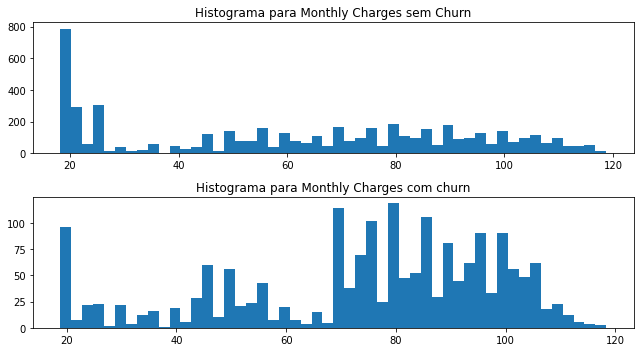

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9, 5))

ax[0].hist(class_0['MonthlyCharges'], bins=50)
ax[0].set_title('Histograma para Monthly Charges sem Churn')

ax[1].hist(class_1['MonthlyCharges'], bins=50)
ax[1].set_title('Histograma para Monthly Charges com churn')



plt.tight_layout()

* The histograms for the ``TotalCharges`` variable show a close to Pareto distribution. For ``MonthlyCharges`` we have a much less ordered distribution of frequencies, in addition to a clear difference between the observations with and without churn. As the graph indicates, churn observations are relatively more common when there is a higher monthly bill.



* Now, let's analyze these differences with a boxplot.

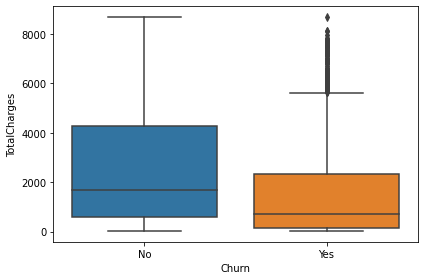

In [24]:
fig, ax = plt.subplots(figsize=(6, 4), sharex=True)
sns.boxplot(x= churn['Churn'], y=churn['TotalCharges'], ax=ax)
plt.tight_layout()

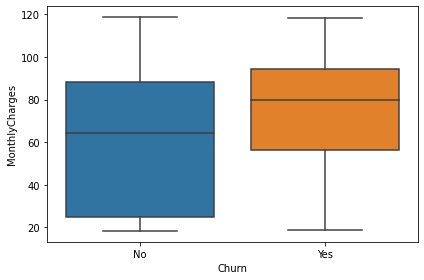

In [25]:
fig, ax = plt.subplots(figsize=(6, 4), sharex=True)
sns.boxplot(x=churn['Churn'], y=churn['MonthlyCharges'], ax=ax)
plt.tight_layout()

* ``TotalCharges``

  * The median of observations without churn is greater than those with churn
  * There is a greater presence of outliers in observations with churn.

* ``MonthlyCharges``

  * The median of churn observations tends to be higher.


What explains this discrepancy between the medians? One hypothesis would be that people with more expensive monthly subscriptions tend to subscribe for less time, making the total payment of people who did not have churn to be, on average, higher.

### What is the influence of gender on the occurrence of *churn*?

A reasonable question to ask is whether men or women are more likely to opt out of that telecommunications company. To verify this, we must first analyze how the two genders are distributed in the dataset. After that, we can compare this to how the genders are distributed for those observations where *churn* occurs.

The proportion of men is: 0.504756495811444
A proporção de women is: 0.495243504188556


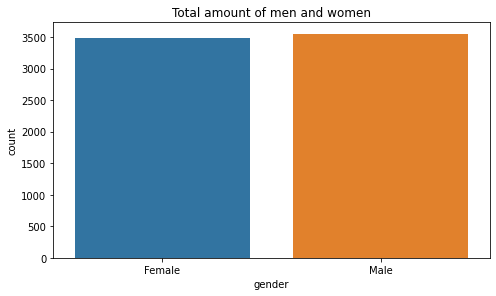

In [26]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(data=churn, x='gender')
plt.tight_layout()

ax.set_title('Total amount of men and women')

print(f"The proportion of men is: {len(churn['gender'].loc[churn['gender'] == 'Male']) / len(churn['gender'])}")
print(f"A proporção de women is: {len(churn.loc[churn['gender'] == 'Female']) / len(churn)}")

The proportion of men is: 0.49759229534510435
The proportion of women is: 0.5024077046548957


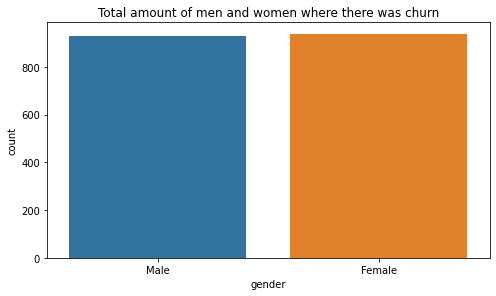

In [27]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(data=churn.loc[churn['Churn'] == 'Yes'], x='gender')

plt.tight_layout()

ax.set_title('Total amount of men and women where there was churn')

print(f"The proportion of men is: {len(churn['gender'].loc[(churn['gender'] == 'Male') & (churn['Churn'] == 'Yes')]) / len(churn['gender'].loc[churn['Churn'] == 'Yes'])}")
print(f"The proportion of women is: {len(churn.loc[(churn['gender'] == 'Female') & (churn['Churn'] == 'Yes')]) / len(churn.loc[churn['Churn'] == 'Yes'])}")

The results show us that, among the observations in which there was *churn*, there is not a significantly greater predominance of men or women.

### Do "partner" customers have a lower occurrence of *churn*?

Let's apply the same procedure for gender, but now we'll use the variable ``Partner`` to compare the *churn* rate between partners and non-partners of the company.

The poroportion of partners is: 0.4830327985233565
The proportion of non-partners is: 0.5169672014766434


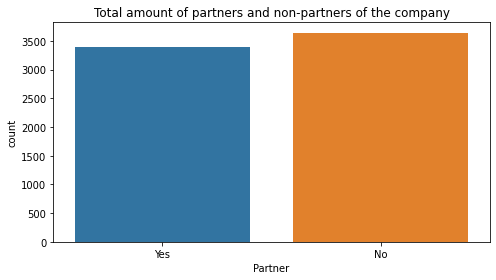

In [28]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_title('Total amount of partners and non-partners of the company')
sns.countplot(data=churn, x='Partner')
plt.tight_layout()

print(f"The poroportion of partners is: {len(churn.loc[churn['Partner'] == 'Yes']) / len(churn['gender'])}")
print(f"The proportion of non-partners is: {len(churn.loc[churn['Partner'] == 'No']) / len(churn)}")

The proportion of partners is: 0.3579454253611557
The proportion of non-partners is: 0.6420545746388443


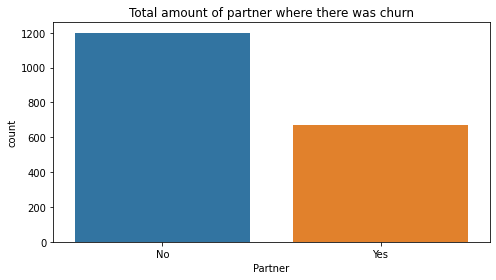

In [29]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(data=(churn.loc[churn['Churn'] == 'Yes']), x='Partner')
ax.set_title('Total amount of partner where there was churn')
plt.tight_layout()

print(f"The proportion of partners is: {len(churn.loc[(churn['Partner'] == 'Yes') & (churn['Churn'] == 'Yes')]) / len(churn.loc[churn['Churn'] == 'Yes'])}")
print(f"The proportion of non-partners is: {len(churn.loc[(churn['Partner'] == 'No') & (churn['Churn'] == 'Yes')]) / len(churn.loc[churn['Churn'] == 'Yes'])}")

In this case we see a very different scenario. The data indicate that the *churn* rate of members is significantly lower than that of non-members. Therefore, we have an indication that a way for the company to keep its customers and avoid churns is to increase its partner base.

### Do customers with longer contracts tend to cancel less?

Let's apply the same procedure again, but this time to the ``Contract`` variable.

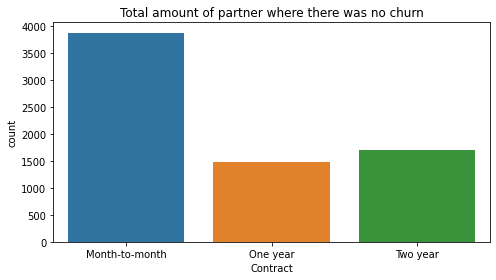

In [30]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(data=churn, x='Contract')
ax.set_title('Total amount of partner where there was no churn')
plt.tight_layout()

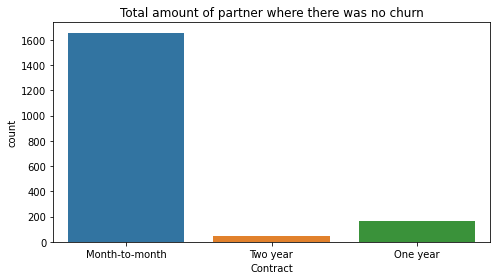

In [31]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(data=churn[churn['Churn'] == 'Yes'], x='Contract')
ax.set_title('Total amount of partner where there was no churn')
plt.tight_layout()

The plots show that there is a tendency for more *churns* to occur in users with monthly contracts, as opposed to longer contracts (one year and two years).

## Data pre-processing

The next step is to pre-process the data so that it can be used by machine learning models.

* Clearly define the values ​​of the target variable.

* Deal with missing data (as already seen, they exist in the ``TotalCharges`` variable)

* Transform categorical variables into numerical ones. The binary ones will be transformed by the *label encoder* method, while the *one hot encoder* will be used in the non-binary ones.

* Standardize the data.

* Remove unnecessary variables.

### Defining the target variable

The target variable is binary, that is, it represents the occurrence or not of *churn*. Therefore, we will define it as follows:

* If there was *churn*, then its value is equal to 1.

* Otherwise, it is set equal to 0.

In [32]:
churn['Churn'] = np.where(churn['Churn'] == 'Yes', 1, 0)


### Removing variables

The ``customerID`` column does not have any relevant information, it just informs the customer identification code. So let's remove it.

In [33]:
churn = churn.drop('customerID', axis=1)

### Removing missing values

We have, as already seen, 11 missing values ​​in the data set. Let's remove these entries.

In [34]:
churn = churn.dropna(axis=0)

### Feature engineering

Changes made to the data need to be made depending on the types of variables we have in that dataset. Thus, we will use a function that separates the variables according to this classification.

There are 3 types of variables in the dataset:

* Numerical.

* Binary categorical.

* Non-binary categorical

In [35]:
bin_var, cat_var, num_var = classification_features(churn, 'Churn')

### Categorical and non-binary features

In [36]:
churn = pd.get_dummies(churn, columns = cat_var)

### Categorical and binary features

In [37]:
ordinal_encoder = OrdinalEncoder(dtype=int)
ordinal_encoder.fit(churn[bin_var])
churn[bin_var] = ordinal_encoder.transform(churn[bin_var])

### Train-test split

In [38]:
feature = churn.drop('Churn', axis=1)
target = churn['Churn']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

For preprocessing we will use:

* Numerical variables: standardization of the data.

* Binary categorical variables: binary encoder ("0 and 1").

* Non-binary categorical variables: *One Hot Encoder*.

### Numerical features

In [40]:
scaler = StandardScaler()
scaler.fit(X_train[num_var])
X_train[num_var] = scaler.transform(X_train[num_var])
X_test[num_var] = scaler.transform(X_test[num_var])

## Selecting a simple algorithm

We will also test the performance of several simple models and select the one with the best performance to further improve. For this, we will test the following classification algorithms, through a *5-fold* cross-validation:

* Logistic regression.

* Random Forest.

* Ada Boost.

* Support Vector Machine.

* K-Nearest Neighbors.

* XGBoost.

### Evaluation metrics

Before building the models, it is necessary to specify the means by which we will evaluate their performance. In this context, a model would have two types of possible errors:

* Predict the occurence of churn, but churn not to occur.

* Predict that churn will not occur, but churn will occur.

The first type would be a **false positive** error, while the second would be a **false negative** case.

For this problem specifically, a false negative error would be much more harmful for the company, as it would mean the loss of a customer. Given this fact, the main metric we will use will be *recall*. It is related to the amount of false negatives in the predictions made by the model.

In [41]:
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               AdaBoostClassifier(),
               SVC(),
               KNeighborsClassifier(),
               XGBClassifier()]

In [42]:
for classifier in classifiers:
  score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
  print(classifier, score.mean())

LogisticRegression() 0.5591973244147157
RandomForestClassifier() 0.5063545150501672
AdaBoostClassifier() 0.5431438127090301
SVC() 0.5083612040133779
KNeighborsClassifier() 0.545819397993311
XGBClassifier() 0.5418060200668896



As we can see, very similar results were obtained by logistic regression, AdaBoost, K-Nearest Neighbors and XGBoost. We will test two models here: a logistic regression, as it had the best standard performance, and an XGBoost, as it is a highly flexible model with great potential for improvement.

### Dealing with data imbalance

As we saw earlier, there is an imbalance of data between the two classes. To deal with this, we will use the *class weight* method here, which sets a higher penalty in the algorithm for misclassification of the minority class, which is precisely what we are trying to predict here.

## Logistic regression

Let's start by training a logistic regression. We will optimize the regularization hyperparameter (``C``) with a *grid search*.

In [43]:
cv = StratifiedKFold(shuffle=True)

In [44]:
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=300)

In [45]:
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search_log = GridSearchCV(log_reg, log_reg_params, cv = cv, scoring='recall')
grid_search_log.fit(X_train, y_train)

grid_search_log.best_params_, grid_search_log.best_score_

({'C': 1}, 0.8)

In [46]:
log_reg = LogisticRegression(class_weight='balanced', random_state=42, C=10)

In [47]:
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

In [48]:
metrics(y_test, log_reg_preds)

Accuracy:  0.7299218194740583
Recall:  0.7914438502673797
Precision:  0.49498327759197325
F1-score:  0.6090534979423867


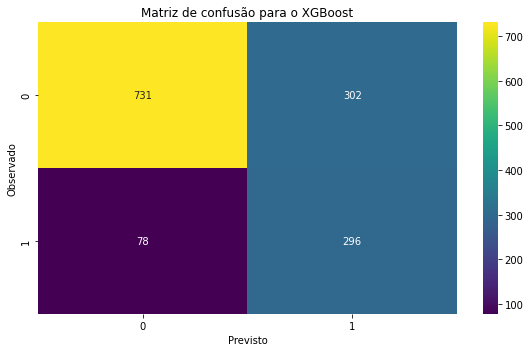

In [49]:
plot_confusion_matrix(y_test, log_reg_preds)

## XGBoost

XGBoost is a decision algorithm that belongs to the family of *gradient boosting* models, which are sophistications of decision trees.

### Optimizing hyperparameters

A typical approach to hyperparameter optimization with XGBoost is as follows:

* Choose a default *learning rate* (such as 0.1). From there, choose the best number of trees for training.

* Optimize tree parameters.

* Optimize the regularization parameters.

Therefore, instead of considering all possible combinations of hyperparameters, we divide the process into steps and optimize one step at a time.

#### Optimizing the number of trees (``n_instances``)

In [50]:
xgb1 = XGBClassifier(
    learning_rate=0.1,
    seed=27,
    scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train== 1])
)

In [51]:
param_grid = {
    'n_estimators': [n for n in range(100, 1000, 50)]
}


grid_search = GridSearchCV(xgb1, param_grid, scoring='recall', n_jobs=-1, verbose=2, cv=cv)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(scale_pos_weight=2.762541806020067,
                                     seed=27),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800, 850, 900, 950]},
             scoring='recall', verbose=2)

In [52]:
print(grid_search.best_params_, grid_search.best_score_)

{'n_estimators': 100} 0.8


#### ``min_child_weight`` e ``max_depth``

In [53]:
xgb2 = XGBClassifier(
    learning_rate=0.1,
    scale_pos_weight= len(y_train[y_train == 0]) / len(y_train[y_train== 1]),
    seed=27,
    n_estimators=100
)

In [54]:
tree_param_grid = {
    'max_depth': [n for n in range(3, 10)],
    'min_child_weight': [n for n in range(3, 10)]
}


tree_grid_search = GridSearchCV(xgb2, tree_param_grid, scoring='recall', n_jobs=-1, verbose=2, cv=cv)

tree_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(scale_pos_weight=2.762541806020067,
                                     seed=27),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_child_weight': [3, 4, 5, 6, 7, 8, 9]},
             scoring='recall', verbose=2)

In [55]:
tree_param_grid = {
    'max_depth': [n for n in range(3, 10)],
    'min_child_weight': [n for n in range(3, 10)]
}


tree_grid_search = GridSearchCV(xgb2, tree_param_grid, scoring='recall', n_jobs=-1, verbose=2, cv=cv)

tree_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(scale_pos_weight=2.762541806020067,
                                     seed=27),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_child_weight': [3, 4, 5, 6, 7, 8, 9]},
             scoring='recall', verbose=2)

#### ``gamma``

In [56]:
xgb3 = XGBClassifier(
    learning_rate=0.1,
    scale_pos_weight= len(y_train[y_train == 0]) / len(y_train[y_train== 1]),
    seed=27,
    n_estimators=100,
    max_depth = 3,
    min_child_weight = 4
)

In [57]:
gamma_params = {
    'gamma' : [n/10.0 for n in range(0, 10)]
}
grid_search_gamma = GridSearchCV(xgb3, gamma_params, cv = cv, scoring='recall')
grid_search_gamma.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(min_child_weight=4,
                                     scale_pos_weight=2.762541806020067,
                                     seed=27),
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9]},
             scoring='recall')

In [58]:
print(grid_search_gamma.best_params_, grid_search_gamma.best_score_)

{'gamma': 0.8} 0.802675585284281


#### ``subsample`` e ``colsample_bytree``

In [59]:
sample_params = {
    'subsample': [n/10 for n in range(5, 10)],
    'colsample_bytrre': [n/10 for n in range(5, 10)]
}

grid_search_sample = GridSearchCV(xgb3, sample_params, cv = cv, scoring='recall')
grid_search_sample.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(min_child_weight=4,
                                     scale_pos_weight=2.762541806020067,
                                     seed=27),
             param_grid={'colsample_bytrre': [0.5, 0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='recall')

In [60]:
print(grid_search_sample.best_params_, grid_search_sample.best_score_)

{'colsample_bytrre': 0.5, 'subsample': 0.6} 0.7933110367892977


In [61]:
learning_params = {
    'learning_rate': [n/100 for n in range(1, 10, 2)]}


grid_search_learning = GridSearchCV(xgb3, learning_params, cv = cv, scoring='recall')
grid_search_learning.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(min_child_weight=4,
                                     scale_pos_weight=2.762541806020067,
                                     seed=27),
             param_grid={'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09]},
             scoring='recall')

In [62]:
print(grid_search_learning.best_params_, grid_search_learning.best_score_)

{'learning_rate': 0.05} 0.8120401337792643


In [63]:
xgb4 = XGBClassifier(
    learning_rate=0.01,
    scale_pos_weight= len(y_train[y_train == 0]) / len(y_train[y_train== 1]),
    seed=27,
    n_estimators=100,
    gamma=0,
    colsample_bytree = 0.5,
    subsample=0.9 
)

In [64]:
xgb4.fit(X_train, y_train)
xgb_preds = xgb4.predict(X_test)

In [65]:
metrics(y_test, xgb_preds)

Accuracy:  0.7185501066098081
Recall:  0.8155080213903744
Precision:  0.4825949367088608
F1-score:  0.606361829025845


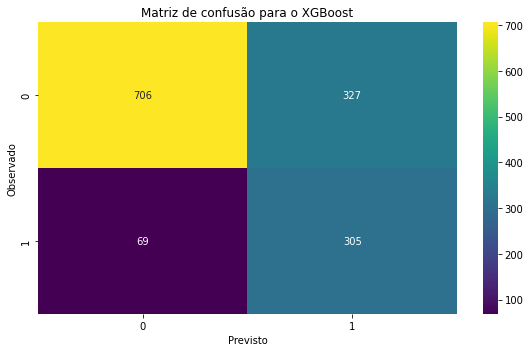

In [66]:
plot_confusion_matrix(y_test, xgb_preds)

## Results -- business metrics

With the results obtained, we can calculate some business metrics.

* Churn rate: as explained at the beginning, it is the proportion of customers that churn in the data set.

* Predicted churn rate: is the churn rate predicted by the model.

* Is the churn rate correctly predicted by the model, relative to the total data set.

* Annual churn MMR per customer: is the amount of average annual revenue that each customer that churns and was correctly predicted by the model generates. If we assume that, by identifying these customers, we can prevent 100% of the churns from happening, then this value would be equal to the revenue saved by the company per year and per customer.

In [67]:
xgb_preds = pd.Series(xgb_preds, index=y_test.index)
log_reg_preds = pd.Series(log_reg_preds, index=y_test.index)

In [68]:
print("Métricas de negócios -- regressão logística\n")
business_metrics(y_test, xgb_preds, churn, 'MonthlyCharges')

Métricas de negócios -- regressão logística



Churn rate                      0.265814
Predicted churn rate            0.449183
Recall                          0.815508
Corrected predicted churns      0.216773
Yearly MRR churn by client    782.413220
dtype: float64

In [69]:
print('Métricas de negócios\n')
business_metrics(y_test, log_reg_preds, churn, 'MonthlyCharges')

Métricas de negócios



Churn rate                      0.265814
Predicted churn rate            0.425018
Recall                          0.791444
Corrected predicted churns      0.210377
Yearly MRR churn by client    782.413220
dtype: float64

## Conclusions

As can be seen, we obtain extremely similar results between the two algorithms and even identical in the case of the annual MMR. The biggest weakness of the models is the occurrence of false positives.

However, churn detection is around 80%, which reflects a very large earnings potential for the company. So, after implementing this model, the next step would be to create strategies that are able to keep as many customers as possible identified by the machine learning algorithm.

Among them, we can mention offering incentives, gifts, discounts, offering better services, improving the quality of contracts, among other alternatives.